In [413]:
#Importa la libreria Pandas
import pandas as pd


In [419]:
datos_limpios= pd.read_csv("datos_limpios.csv", encoding="latin1",sep=";")

In [420]:
#Descargar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import root_mean_squared_error

In [421]:
#Para que los datos puedan ser leidos como numeros, se debe cambiar la coma por el punto
datos_limpios = datos_limpios.replace(',', '.', regex=True).astype(float)

In [423]:
# Modelo regresion lineal simple teniendo en cuenta los datos limpios

In [792]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes",
"pets_allowed_Cats,Dogs", "pets_allowed_No","source_RentDigs.com", "source_RentLingo"
]]
y = datos_limpios['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [793]:
# Definir el modelo
model = LinearRegression()
# Entrenar el modelo con los datos originales
model.fit(X_train, y_train)
# Predicciones
y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)
# Evaluación del modelo
#RMSE
rmse_train = root_mean_squared_error(y_train, y_pred_train1)  # RMSE
rmse_test = root_mean_squared_error(y_test, y_pred_test1)
# Evitar división por cero en MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_train = mean_absolute_percentage_error(y_train, y_pred_train1)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test1)
# Resultados
print("Métricas en Entrenamiento:")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.2f}%")

print("\nMétricas en Prueba:")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.2f}%")

Métricas en Entrenamiento:
RMSE: 588.0340
MAPE: 33.58%

Métricas en Prueba:
RMSE: 584.6108
MAPE: 33.84%


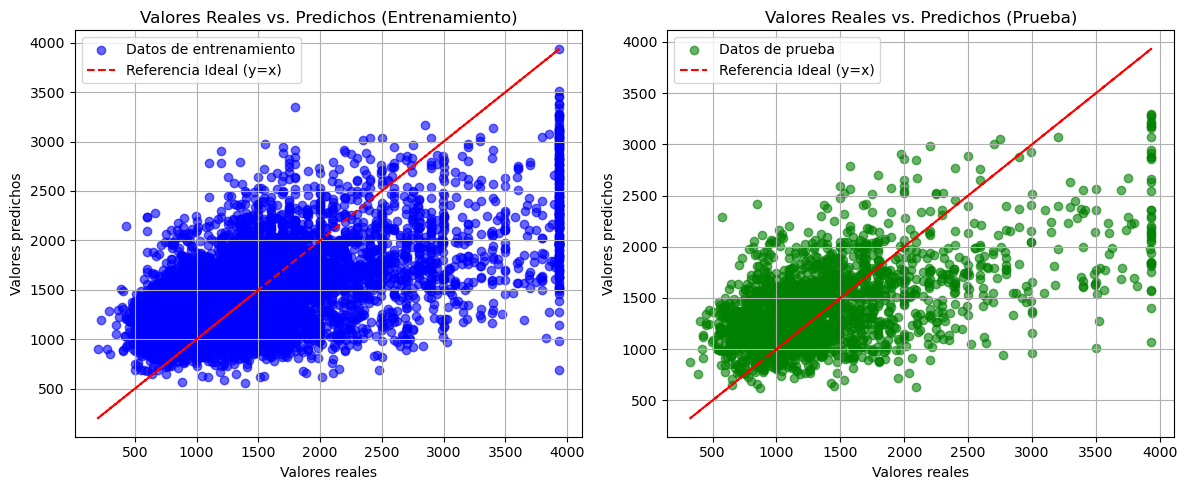

In [426]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))
# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train1, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)
# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test1, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

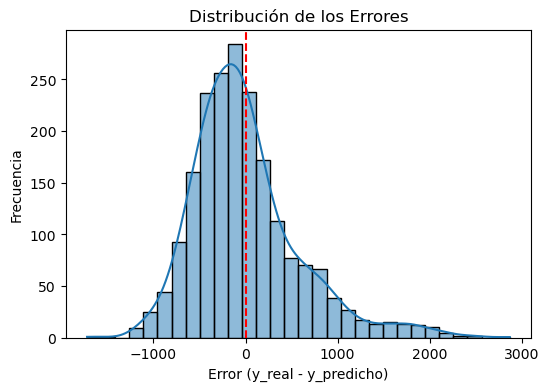

In [427]:
#Grafico de la distribucion de errores
errores1 = y_test - y_pred_test1
plt.figure(figsize=(6,4))
sns.histplot(errores1, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()

In [428]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset


In [ ]:
#Prueba de no linealidad

In [429]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs","pets_allowed_No","source_RentDigs.com","source_RentLingo"]]
y = datos_limpios['price']
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:

# Agregar constante al modelo
X = sm.add_constant(X)
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()
# Aplicar el Test RESET de Ramsey
reset_test = linear_reset(model, power=2, use_f=True)
# Mostrar resultados
print(reset_test)

<F test: F=235.84589841300976, p=1.2621370134640798e-52, df_denom=9.98e+03, df_num=1>


In [432]:
#Modelo polinomico de grado 2 y estandarización de variables

In [776]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail", "has_photo_Yes",
"pets_allowed_Cats,Dogs", "pets_allowed_No","source_RentLingo", "pets_allowed_Dogs","source_ListedBuy"
]]
y = datos_limpios['price']

In [777]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [778]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Escalamiento de variables
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# Generar características polinómicas
grado = 2
poly = PolynomialFeatures(degree=grado)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Validación cruzada con Regresión Lineal y cálculo de MAPE
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mape_scores = []

for train_idx, val_idx in kf.split(X_train_poly):
    X_train_fold, X_val_fold = X_train_poly[train_idx], X_train_poly[val_idx]
    y_train_fold, y_val_fold = y_train_scaled[train_idx], y_train_scaled[val_idx]
    
    modelo = LinearRegression()
    modelo.fit(X_train_fold, y_train_fold)
    
    y_val_pred_scaled = modelo.predict(X_val_fold)
    y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()
    y_val_original = y_scaler.inverse_transform(y_val_fold.reshape(-1, 1)).ravel()
    
    mape = mean_absolute_percentage_error(y_val_original, y_val_pred) * 100
    mape_scores.append(mape)
    print(f"Fold {len(mape_scores)}: MAPE = {mape:.2f}%")

# Resultados de la validación cruzada
print(f"\nPromedio de MAPE: {np.mean(mape_scores):.2f}%")
print(f"Desviación estándar de MAPE: {np.std(mape_scores):.2f}%")

# Entrenar el modelo final
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_poly, y_train_scaled)

# Predicciones
y_train_pred_scaled = modelo_lineal.predict(X_train_poly)
y_test_pred_scaled = modelo_lineal.predict(X_test_poly)

# Desescalar predicciones
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluación del modelo con MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n**Resultados del Modelo**")
print(f"MAPE en entrenamiento: {mape_train:.2f}%")
print(f"MAPE en prueba: {mape_test:.2f}%")
print(f"RMSE en entrenamiento: {rmse_train:.2f}")
print(f"RMSE en prueba: {rmse_test:.2f}")


Fold 1: MAPE = 26.94%
Fold 2: MAPE = 29.98%
Fold 3: MAPE = 27.86%
Fold 4: MAPE = 28.01%
Fold 5: MAPE = 26.70%
Fold 6: MAPE = 27.41%
Fold 7: MAPE = 30.37%
Fold 8: MAPE = 28.54%
Fold 9: MAPE = 24.98%
Fold 10: MAPE = 26.43%

Promedio de MAPE: 27.72%
Desviación estándar de MAPE: 1.54%

**Resultados del Modelo**
MAPE en entrenamiento: 27.25%
MAPE en prueba: 27.67%
RMSE en entrenamiento: 497.72
RMSE en prueba: 487.52


In [436]:
#Modelo polinomico de grado 3 y estandarizacion de variables 

In [694]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail", "has_photo_Yes", "pets_allowed_Cats,Dogs", "source_RentLingo"]]
y = datos_limpios['price']

In [695]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [696]:

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# Escalamiento de variables
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

# Generar características polinómicas
grado = 3
poly = PolynomialFeatures(degree=grado)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Validación cruzada con Regresión Lineal y cálculo de MAPE
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mape_scores = []

for train_idx, val_idx in kf.split(X_train_poly):
    X_train_fold, X_val_fold = X_train_poly[train_idx], X_train_poly[val_idx]
    y_train_fold, y_val_fold = y_train_scaled[train_idx], y_train_scaled[val_idx]
    
    modelo = LinearRegression()
    modelo.fit(X_train_fold, y_train_fold)
    
    y_val_pred_scaled = modelo.predict(X_val_fold)
    y_val_pred = y_scaler.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()
    y_val_original = y_scaler.inverse_transform(y_val_fold.reshape(-1, 1)).ravel()
    
    mape = mean_absolute_percentage_error(y_val_original, y_val_pred) * 100
    mape_scores.append(mape)
    print(f"Fold {len(mape_scores)}: MAPE = {mape:.2f}%")

# Resultados de la validación cruzada
print(f"\nPromedio de MAPE: {np.mean(mape_scores):.2f}%")
print(f"Desviación estándar de MAPE: {np.std(mape_scores):.2f}%")

# Entrenar el modelo final
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_poly, y_train_scaled)

# Predicciones
y_train_pred_scaled = modelo_lineal.predict(X_train_poly)
y_test_pred_scaled = modelo_lineal.predict(X_test_poly)

# Desescalar predicciones
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Evaluación del modelo con MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n**Resultados del Modelo**")
print(f"MAPE en entrenamiento: {mape_train:.2f}%")
print(f"MAPE en prueba: {mape_test:.2f}%")
print(f"RMSE en entrenamiento: {rmse_train:.2f}")
print(f"RMSE en prueba: {rmse_test:.2f}")


Fold 1: MAPE = 24.22%
Fold 2: MAPE = 26.44%
Fold 3: MAPE = 24.82%
Fold 4: MAPE = 25.09%
Fold 5: MAPE = 24.77%
Fold 6: MAPE = 24.42%
Fold 7: MAPE = 26.59%
Fold 8: MAPE = 24.93%
Fold 9: MAPE = 23.93%
Fold 10: MAPE = 24.16%

Promedio de MAPE: 24.94%
Desviación estándar de MAPE: 0.86%

**Resultados del Modelo**
MAPE en entrenamiento: 23.36%
MAPE en prueba: 24.43%
RMSE en entrenamiento: 428.26
RMSE en prueba: 439.15


In [441]:
#Modelo polinomico de grado 3 con regularizacion Ridge y estandarización de variables

In [650]:
# Separar la variable objetivo (precio) y las variables predictoras
X = datos_limpios[["bathrooms","bedrooms","square_feet","latitude","longitude","cityname","state","amenities_count","has_photo_Thumbnail","has_photo_Yes","pets_allowed_Cats,Dogs","pets_allowed_No","source_RentDigs.com",	"source_RentLingo"
]]
y = datos_limpios['price']

In [651]:
# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [652]:

# Escalamos X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()

X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)

y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generamos características polinómicas
grado = 3  
poly = PolynomialFeatures(degree=grado)

X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Validación cruzada para encontrar el mejor alpha en Ridge
alpha_values3 =  np.logspace(-1, 4, 50)
best_alpha3 = None
best_score3 = float("inf")  # Queremos minimizar el RMSE, así que iniciamos con infinito

for alpha in alpha_values3:
    modelo_ridge3 = Ridge(alpha=alpha)
    scores3 = cross_val_score(modelo_ridge3, X_train_poly3, y_train_scaled3, cv=10, scoring='neg_root_mean_squared_error')
    
    mean_rmse3 = -scores3.mean()  # Convertimos a positivo porque sklearn devuelve valores negativos
    
    print(f"Alpha: {alpha}, RMSE promedio: {mean_rmse3:.4f}")
    
    if mean_rmse3 < best_score3:  # Buscamos el menor RMSE
        best_score3 = mean_rmse3
        best_alpha3 = alpha

print(f"\nMejor alpha encontrado: {best_alpha3} con RMSE: {best_score3:.4f}")

# Entrenar el modelo con el mejor alpha
modelo_final3 = Ridge(alpha=best_alpha3)
modelo_final3.fit(X_train_poly3, y_train_scaled3)

# Predicciones en entrenamiento y prueba
y_train_pred_scaled3 = modelo_final3.predict(X_train_poly3)
y_test_pred_scaled3 = modelo_final3.predict(X_test_poly3)

# Desescalar las predicciones
y_train_pred3 = y_scaler3.inverse_transform(y_train_pred_scaled3.reshape(-1, 1)).ravel()
y_test_pred3 = y_scaler3.inverse_transform(y_test_pred_scaled3.reshape(-1, 1)).ravel()

# Calcular RMSE
rmse_train3 = root_mean_squared_error(y_train, y_train_pred3)
rmse_test3 = root_mean_squared_error(y_test, y_test_pred3)

# Calcular MAPE evitando división por cero
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100

mape_train3 = mean_absolute_percentage_error(y_train, y_train_pred3)
mape_test3 = mean_absolute_percentage_error(y_test, y_test_pred3)

print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
# Obtener coeficientes
coeficientes3 = modelo_final3.coef_
nombres_features3 = poly.get_feature_names_out()



Alpha: 0.1, RMSE promedio: 0.6667
Alpha: 0.12648552168552962, RMSE promedio: 0.6659
Alpha: 0.15998587196060582, RMSE promedio: 0.6651
Alpha: 0.20235896477251572, RMSE promedio: 0.6645
Alpha: 0.2559547922699536, RMSE promedio: 0.6639
Alpha: 0.3237457542817644, RMSE promedio: 0.6634
Alpha: 0.40949150623804254, RMSE promedio: 0.6629
Alpha: 0.5179474679231212, RMSE promedio: 0.6625
Alpha: 0.655128556859551, RMSE promedio: 0.6620
Alpha: 0.8286427728546845, RMSE promedio: 0.6615
Alpha: 1.0481131341546859, RMSE promedio: 0.6610
Alpha: 1.3257113655901096, RMSE promedio: 0.6604
Alpha: 1.6768329368110082, RMSE promedio: 0.6597
Alpha: 2.1209508879201904, RMSE promedio: 0.6590
Alpha: 2.682695795279726, RMSE promedio: 0.6582
Alpha: 3.39322177189533, RMSE promedio: 0.6573
Alpha: 4.291934260128778, RMSE promedio: 0.6563
Alpha: 5.428675439323859, RMSE promedio: 0.6552
Alpha: 6.8664884500430015, RMSE promedio: 0.6541
Alpha: 8.685113737513529, RMSE promedio: 0.6528
Alpha: 10.985411419875584, RMSE promed

In [653]:
print(f"\nMejor alpha encontrado: {best_alpha3}")


Mejor alpha encontrado: 471.48663634573944


In [654]:
# Imprimir resultados
print(f"MAPE en entrenamiento: {mape_train3:.2f}%")
print(f"MAPE en prueba: {mape_test3:.2f}%")
print(f"RMSE en entrenamiento: {rmse_train3:.4f}")
print(f"RMSE en prueba: {rmse_test3:.4f}")

MAPE en entrenamiento: 23.38%
MAPE en prueba: 24.22%
RMSE en entrenamiento: 426.4926
RMSE en prueba: 436.0153


In [641]:
#validación cruzada de 10 folds con impresión de los valores R2 ndividuales, su promedio y desviación estándar.

In [655]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_predict
import numpy as np

# Escalar X e Y
X_scaler3 = StandardScaler()
y_scaler3 = StandardScaler()
X_train_scaled3 = X_scaler3.fit_transform(X_train)
X_test_scaled3 = X_scaler3.transform(X_test)
y_train_scaled3 = y_scaler3.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled3 = y_scaler3.transform(y_test.values.reshape(-1, 1)).ravel()

# Generar características polinómicas
grado = 3  # Grado del polinomio
poly = PolynomialFeatures(degree=grado)
X_train_poly3 = poly.fit_transform(X_train_scaled3)
X_test_poly3 = poly.transform(X_test_scaled3)

# Mejor alpha encontrado
alpha_fijo = 471.48663634573944
modelo_ridge_cv = Ridge(alpha=alpha_fijo)

# Definir función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-10))) * 100  # Evitar división por cero

# Validación cruzada manual con KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
mape_scores = []

for i, (train_idx, val_idx) in enumerate(kf.split(X_train_poly3), start=1):
    X_train_fold, X_val_fold = X_train_poly3[train_idx], X_train_poly3[val_idx]
    y_train_fold, y_val_fold = y_train_scaled3[train_idx], y_train_scaled3[val_idx]
    
    modelo_ridge_cv.fit(X_train_fold, y_train_fold)
    y_val_pred_scaled = modelo_ridge_cv.predict(X_val_fold)
    
    # Desescalar las predicciones
    y_val_pred = y_scaler3.inverse_transform(y_val_pred_scaled.reshape(-1, 1)).ravel()
    y_val_real = y_scaler3.inverse_transform(y_val_fold.reshape(-1, 1)).ravel()

    # Calcular MAPE
    mape = mean_absolute_percentage_error(y_val_real, y_val_pred)
    mape_scores.append(mape)

    print(f"Fold {i}: MAPE = {mape:.2f}%")

# Imprimir promedio y desviación estándar de MAPE
print(f"\nPromedio de MAPE: {np.mean(mape_scores):.2f}%")
print(f"Desviación estándar de MAPE: {np.std(mape_scores):.2f}%")



Fold 1: MAPE = 23.53%
Fold 2: MAPE = 26.17%
Fold 3: MAPE = 24.63%
Fold 4: MAPE = 25.27%
Fold 5: MAPE = 24.06%
Fold 6: MAPE = 24.32%
Fold 7: MAPE = 26.63%
Fold 8: MAPE = 24.64%
Fold 9: MAPE = 23.43%
Fold 10: MAPE = 23.56%

Promedio de MAPE: 24.62%
Desviación estándar de MAPE: 1.05%


In [647]:
# Obtener coeficientes y nombres de características del modelo polinomial de grado tres 
coeficientes_polinomicos3 = modelo_final3.coef_
nombres_caracteristicas3 = poly.get_feature_names_out(input_features=X_train.columns)

# Crear un DataFrame con términos y coeficientes
df_coef = pd.DataFrame({"Término": nombres_caracteristicas3, "Coeficiente": coeficientes_polinomicos3})

# Ordenar por magnitud del coeficiente para ver los más importantes
df_coef["Coeficiente_abs"] = df_coef["Coeficiente"].abs()
df_coef = df_coef.sort_values(by="Coeficiente_abs", ascending=False).drop(columns=["Coeficiente_abs"])

# Mostrar coeficientes ordenados
print("\nCoeficientes del Modelo Polinómico con Ridge:")
print(df_coef.to_string(index=False))


Coeficientes del Modelo Polinómico con Ridge:
                                                                           Término   Coeficiente
                                                                       longitude^2  3.319238e-01
                                                                 longitude state^2 -1.718294e-01
                                                                 longitude^2 state -1.639762e-01
                                                                           state^2  1.106950e-01
                                                              latitude^2 longitude  9.428374e-02
                                                              bedrooms square_feet -8.627436e-02
                                                              latitude longitude^2  7.658403e-02
                                                                           state^3  6.828535e-02
                                                                   longitude sta

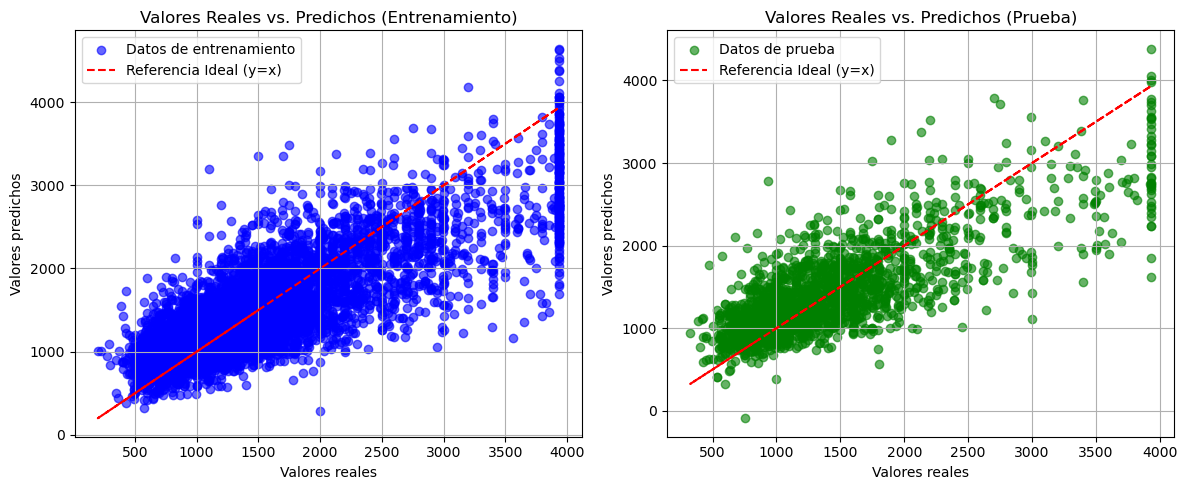

In [648]:
# Graficar valores reales vs predichos
plt.figure(figsize=(12, 5))

# Gráfico para conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred3, alpha=0.6, color='blue', label="Datos de entrenamiento")
plt.plot(y_train, y_train, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Entrenamiento)")
plt.legend()
plt.grid(True)

# Gráfico para conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred3, alpha=0.6, color='green', label="Datos de prueba")
plt.plot(y_test, y_test, color='red', linestyle="--", label="Referencia Ideal (y=x)")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores Reales vs. Predichos (Prueba)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


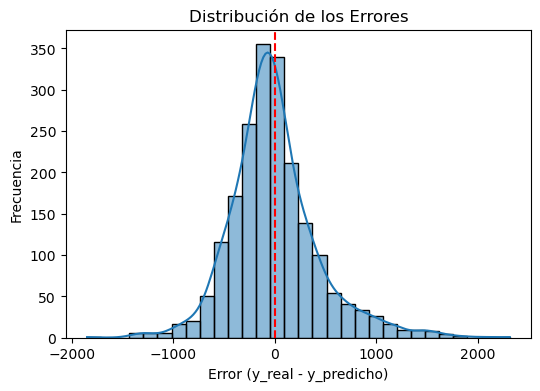

In [649]:
#Graficar la distribución de los errores
errores3 = y_test - y_test_pred3
plt.figure(figsize=(6,4))
sns.histplot(errores3, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Error (y_real - y_predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores")
plt.show()